# Homework 2: Machine Learning for Regression

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md

In [273]:
import pandas as pd
import numpy as np
import wget

In [274]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('laptops.csv')

# Mostrar las primeras filas
df = pd.DataFrame(data)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

In [275]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [276]:
df_train = df[['ram','storage','screen','final_price']]
df_train.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [277]:
df_train.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [278]:
df_train.ram.median()

16.0

In [279]:
# For plotting we use two libraries
 
import matplotlib.pyplot as plt
import seaborn as sns
 
# this line is needed to display the plots in notebooks
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

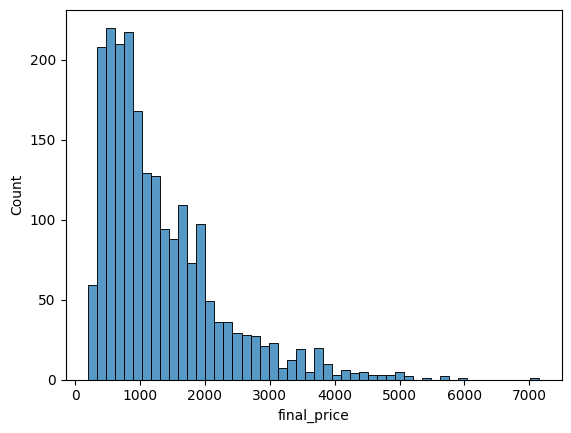

In [280]:
# Look at the final_price variable. Does it have a long tail?
sns.histplot(df_train.final_price, bins=50)


<Axes: xlabel='final_price', ylabel='Count'>

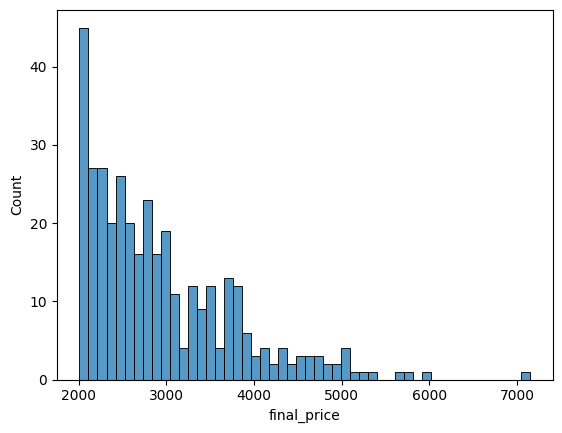

In [281]:
sns.histplot(df_train.final_price[df_train.final_price > 2000], bins=50)

In [282]:
final_price_logs = np.log1p(df_train.final_price)
final_price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

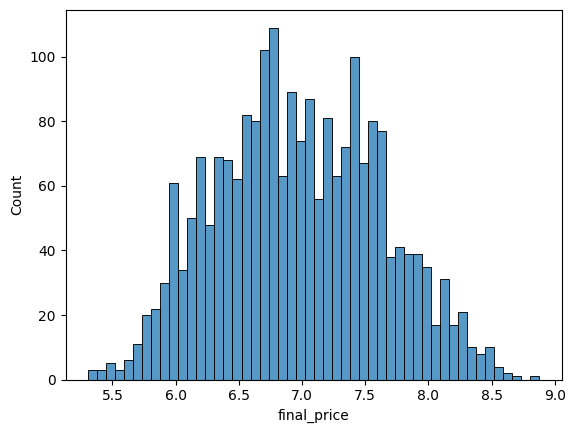

In [283]:
sns.histplot(final_price_logs, bins=50)

In [284]:
# Returns the number of records of the whole dataset
np.random.seed(9)

n = len(df_train)
n_val=int(len(df_train) * 0.2)
n_test=int(len(df_train) * 0.2)
n_train=int(len(df_train) * 0.6)

In [285]:
#Shuffle the dataset (the filtered one you created above), use seed 42.
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
n , n_val + n_test + n_train

(2160, 2160)

In [286]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_train.iloc[idx]

In [287]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [288]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [289]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [290]:
base = ['ram','storage','screen']

In [291]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [292]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [293]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [294]:
y_pred = w_0 + X_train.dot(w)

In [295]:
# results = {}  # Diccionario para guardar r y su respectivo RMSE

# for r_value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Establecer la semilla aleatoria con el valor de r
    # np.random.seed(r_value)
    
    # Generar el y_pred en función de la semilla
    # y_pred = np.random.rand(len(y_val))  # Ejemplo de predicción aleatoria, reemplaza según tu caso
    
    # Calcular el RMSE
    # error = rmse(y_val, y_pred)
    
    # Guarda el valor de r y su RMSE en el diccionario
    # results[r_value] = error
    
    # Imprimir el resultado en cada iteración
    # print(f"Para r = {r_value}, el RMSE es igual a {error}")

# Si después quieres ver todos los resultados, puedes imprimir el diccionario
# print(results)


In [306]:
# valores = list(results.values())

# Calcular la desviación estándar
# desviacion_estandar = np.std(valores)

# Redondear a 3 decimales
# desviacion_estandar_redondeada = round(desviacion_estandar, 3)

# print(f"La desviación estándar de los valores es: {desviacion_estandar_redondeada}")

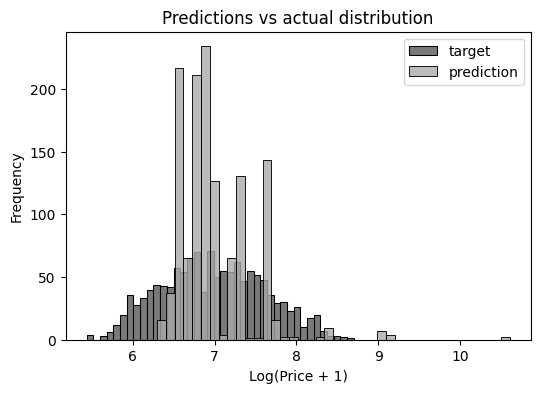

In [297]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [298]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse),2)

In [299]:
rmse(y_train, y_pred)

0.44

In [300]:
def prepare_X_mean(df):
    df_num = df[base]
    # Rellenar los NaN con la media de cada columna
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X


In [301]:
#X_train = prepare_X_mean(df_train)
#w_0, w = train_linear_regression(X_train, y_train)

In [302]:
# y_pred = w_0 + X_train.dot(w)

In [303]:
# rmse(y_train, y_pred)

In [304]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [305]:
X_train = prepare_X(df_train)
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
   
    print(f"Para {r=}, el RMSE es igual a {rmse(y_val, y_pred)}")

Para r=0, el RMSE es igual a 0.41
Para r=0.01, el RMSE es igual a 0.41
Para r=1, el RMSE es igual a 0.42
Para r=10, el RMSE es igual a 0.57
Para r=100, el RMSE es igual a 0.77


In [308]:
df_full_train = pd.concat([df_train, df_val])

In [307]:
y_full_train = np.concatenate([y_train, y_val])

array([7.37393285, 7.20785987, 6.30991828, ..., 6.74523635, 6.56939727,
       6.65930674])

In [309]:
df_full_train = df_full_train.reset_index(drop=True)

In [310]:
X_full_train = prepare_X(df_full_train) 

In [311]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(6.756907487743699, array([ 0.02677397,  0.00070309, -0.04083534]))

In [316]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)

print("rmse: ",score)

rmse:  0.46
